In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%xmode Minimal

Exception reporting mode: Minimal


Data source: the NOAA Extended Reconstructed Sea Surface Temperature (ERSST) v5 product, a widely used and trusted gridded compilation of of historical data going back to 1854.

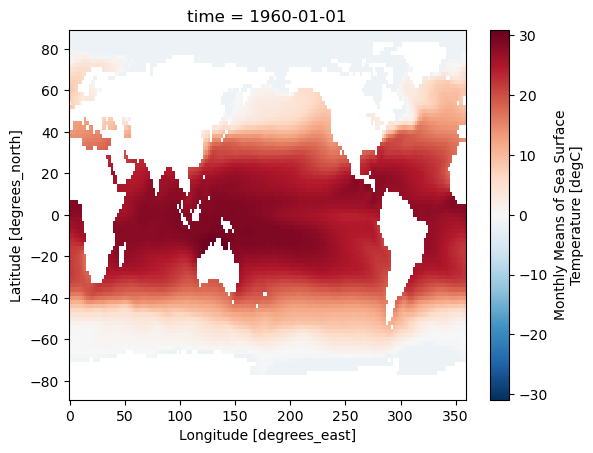

In [16]:
#url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
#ds = xr.open_dataset(url, drop_variables=['time_bnds'])
#ds = ds.sel(time=slice('1960', '2018'))#.load()
#ds.sst.data
ds.isel(time = 0).sst.plot()

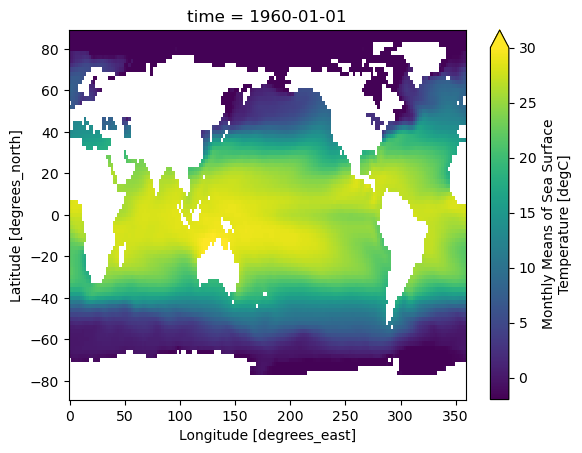

In [17]:
ds.sst[0].plot(vmin=-2, vmax=30)

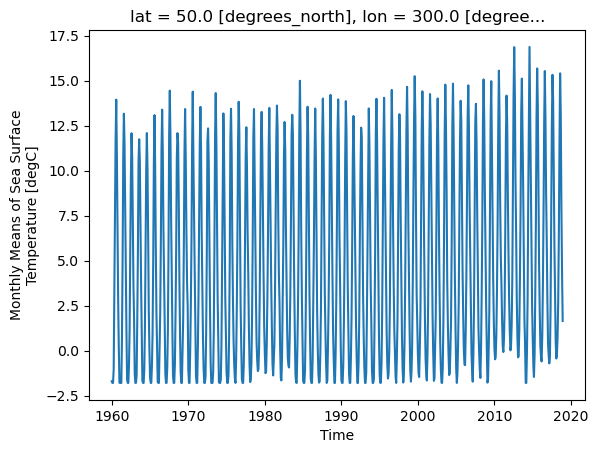

In [18]:
ds.sst.sel(lon=300, lat=50).plot()

In [30]:
ds.time.dt

In [31]:
ds

<xarray.Dataset> Size: 45MB
Dimensions:  (lat: 89, lon: 180, time: 708)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 6kB 1960-01-01 1960-02-01 ... 2018-12-01
Data variables:
    sst      (time, lat, lon) float32 45MB ...
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2025-01-03
    DODS_EXTRA.Unlimited_Dimension:  time

In [32]:
gb = ds.sst.groupby(ds.time.dt.month)
#gb = ds.sst.groupby('time.month')
gb

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

In [50]:
for group_name, group_da in gb:
    # stop iterating after the first loop
    break 

#group_da.mean(dim = "time")
group_da - group_da.mean(dim = "time")

<xarray.DataArray 'sst' (time: 59, lat: 89, lon: 180)> Size: 4MB
array([[[9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
        [9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
        [9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
        [9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
        [9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
...
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
        [9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
        [9.536743e-07, 9.536743e-07, 9.536743e-07, ..., 9.536743e-07,
         9.536743e-07, 9.536743e-07],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 472B 1960-01-01 1961-01-01 ... 2018-01-01

In [39]:
# this does the same thing as the previous cell
sst_mm = gb.mean(dim='time')
sst_mm

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)> Size: 769kB
array([[[-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.7995427, -1.799635 , -1.7998594, ..., -1.7997919,
         -1.7996687, -1.7995385],
        [-1.7995995, -1.7997797, -1.8000009, ..., -1.8000009,
         -1.7998233, -1.7996242],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

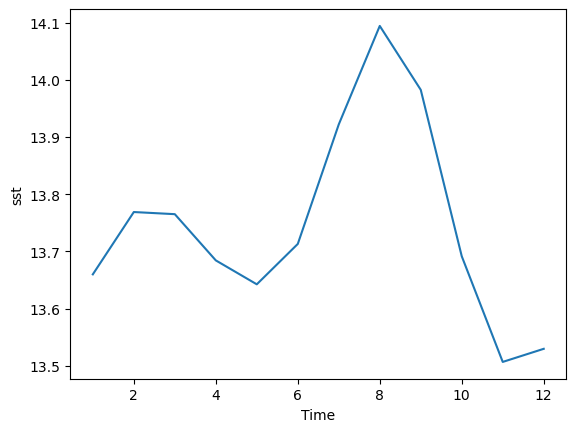

In [43]:
sst_mm.mean(dim = ["lat", "lon"]).plot()

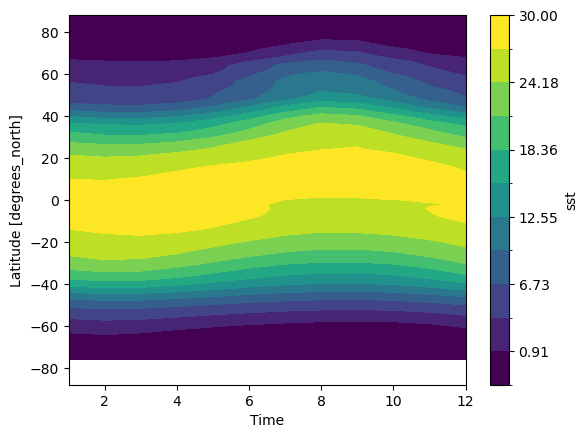

In [44]:
sst_mm.mean(dim='lon').transpose().plot.contourf(levels=12, vmin=-2, vmax=30)

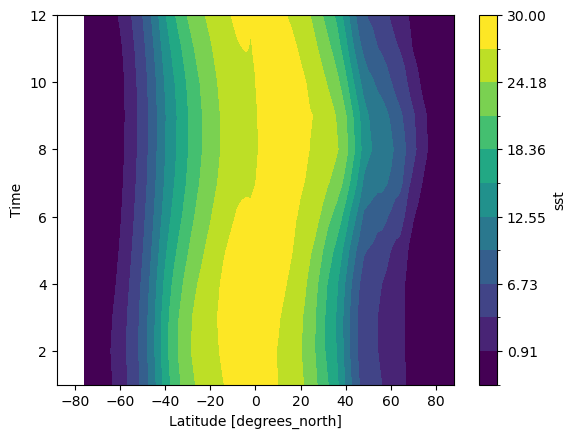

In [45]:
sst_mm.mean(dim='lon').plot.contourf(levels=12, vmin=-2, vmax=30)

In [46]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

ds_anom = ds.groupby('time.month').apply(remove_time_mean)
ds_anom

<xarray.Dataset> Size: 45MB
Dimensions:  (time: 708, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 6kB 1960-01-01 1960-02-01 ... 2018-12-01
Data variables:
    sst      (time, lat, lon) float32 45MB 9.537e-07 9.537e-07 ... nan nan

In [53]:
gb = ds.groupby('time.month')
ds_anom = gb - gb.mean(dim='time')
ds_anom.time.dt.year

<xarray.DataArray 'year' (time: 708)> Size: 6kB
array([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       1960, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961,
       1961, 1961, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962,
       1962, 1962, 1962, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963,
       1963, 1963, 1963, 1963, 1964, 1964, 1964, 1964, 1964, 1964, 1964,
       1964, 1964, 1964, 1964, 1964, 1965, 1965, 1965, 1965, 1965, 1965,
       1965, 1965, 1965, 1965, 1965, 1965, 1966, 1966, 1966, 1966, 1966,
       1966, 1966, 1966, 1966, 1966, 1966, 1966, 1967, 1967, 1967, 1967,
       1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1968, 1968, 1968,
       1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1969, 1969,
       1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1970,
       1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971,
       1971, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972,
       1972, 1972, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973,
       1973, 1973, 1973, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974,
       1974, 1974, 1974, 1974, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1976, 1976, 1976, 1976, 1976, 1976,
       1976, 1976, 1976, 1976, 1976, 1976, 1977, 1977, 1977, 1977, 1977,
       1977, 1977, 1977, 1977, 1977, 1977, 1977, 1978, 1978, 1978, 1978,
...
       2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002,
       2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2003,
       2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018])
Coordinates:
  * time     (time) datetime64[ns] 6kB 1960-01-01 1960-02-01 ... 2018-12-01
    month    (time) int64 6kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-07 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [19723. 82149.]
    _ChunkSizes:      1

In [51]:
ds_anom_resample = ds_anom.resample(time='5Y').mean(dim='time')
ds_anom_resample

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/groupers.py:392: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


<xarray.Dataset> Size: 834kB
Dimensions:  (time: 13, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 104B 1960-12-31 1965-12-31 ... 2020-12-31
Data variables:
    sst      (time, lat, lon) float32 833kB -0.0005207 -0.0004956 ... nan nan

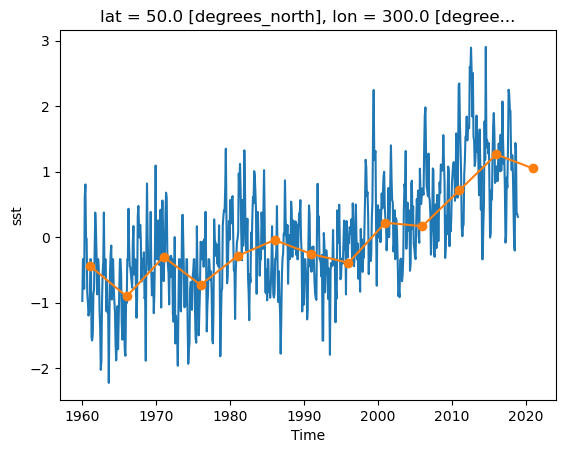

In [58]:
ds_anom.sst.sel(lon=300, lat=50).plot()
ds_anom_resample.sst.sel(lon=300, lat=50).plot(marker='o')
#ds_anom_resample

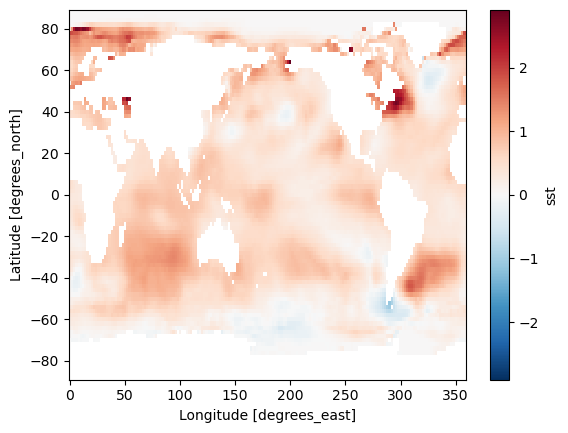

In [60]:
(ds_anom_resample.sel(time='2015-01-01', method='nearest') -
 ds_anom_resample.sel(time='1965-01-01', method='nearest')).sst.plot()

In [61]:
ds_anom_rolling = ds_anom.rolling(time=12, center=True).mean()
ds_anom_rolling

<xarray.Dataset> Size: 45MB
Dimensions:  (lat: 89, lon: 180, time: 708)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 6kB 1960-01-01 1960-02-01 ... 2018-12-01
    month    (time) int64 6kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time, lat, lon) float32 45MB nan nan nan nan ... nan nan nan nan

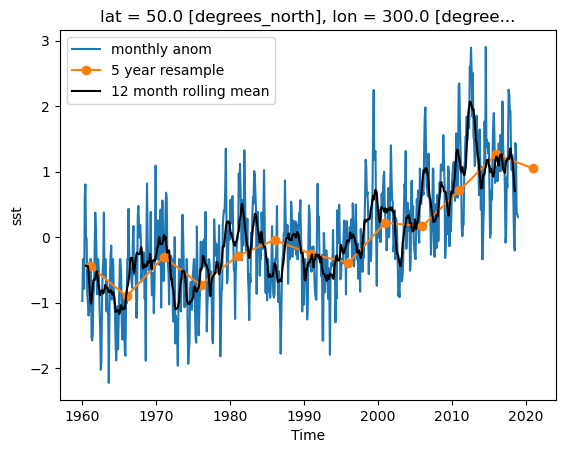

In [62]:
ds_anom.sst.sel(lon=300, lat=50).plot(label='monthly anom')
ds_anom_resample.sst.sel(lon=300, lat=50).plot(marker='o', label='5 year resample')
ds_anom_rolling.sst.sel(lon=300, lat=50).plot(label='12 month rolling mean', color='k')
plt.legend()


In [63]:
ds.coarsen(time=12).mean()

<xarray.Dataset> Size: 4MB
Dimensions:  (time: 59, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 472B 1960-06-16T08:00:00 ... 2018-06-16T12...
Data variables:
    sst      (time, lat, lon) float32 4MB -1.8 -1.8 -1.8 -1.8 ... nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2025-01-03
    DODS_EXTRA.Unlimited_Dimension:  time

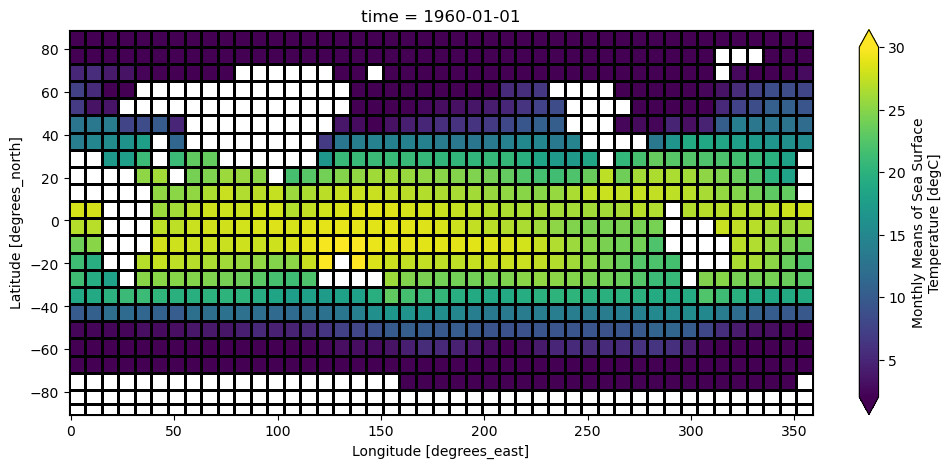

In [64]:
ds_coarse = ds.coarsen(lon=4, lat=4, boundary='pad').mean()
ds_coarse.sst.isel(time=0).plot(vmin=2, vmax=30, figsize=(12, 5), edgecolor='k')